TODO uncomment line below before p2j.

In [3]:
%matplotlib inline
from matplotlib import style

In [4]:
style.use('dark_background')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

In [6]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

Reflect Tables into SQLAlchemy ORM<br>
create engine to hawaii.sqlite

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

reflect an existing database into a new model

In [8]:
Base = automap_base()

reflect the tables

In [9]:
Base.prepare(engine, reflect=True)

View all of the classes that automap found

In [10]:
Base.classes.keys()

['measurement', 'station']

Save references to each table

In [11]:
Measurement = Base.classes.measurement
Station = Base.classes.station

Create our session (link) from Python to the DB

In [12]:
session = Session(engine)

Exploratory Precipitation Analysis<br>
Find the most recent date in the data set.

In [13]:
first_date = session.query(
    Measurement.date
).order_by(
    Measurement.date
).first()

In [14]:
last_date = session.query(
    Measurement.date
).order_by(
    Measurement.date.desc()
).first()

In [15]:
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')

Design a query to retrieve the last 12 months of precipitation data and plot the results.<br>
Starting from the most recent data point in the database.<br>
Calculate the date one year from the last date in data set.

In [16]:
year_ago = last_date - dt.timedelta(days=365)

Perform a query to retrieve the data and precipitation scores

In [17]:
precip = session.query(
    Measurement.date,
    Measurement.prcp
).filter(
    Measurement.date > year_ago
).order_by(Measurement.date).all()

Save the query results as a Pandas DataFrame and set the index to the date column<br>
Sort the dataframe by date

In [18]:
precip_df = pd.DataFrame(
    precip,
    columns=['date', 'prcp']
).set_index('date').sort_index(ascending=True)

Use Pandas Plotting with Matplotlib to plot the data

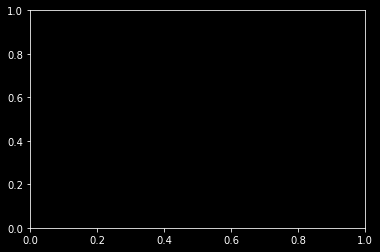

In [19]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})

<AxesSubplot:title={'center':'Precipitation Data for August 2016 to August 2017'}, xlabel='Date', ylabel='Precipitation'>

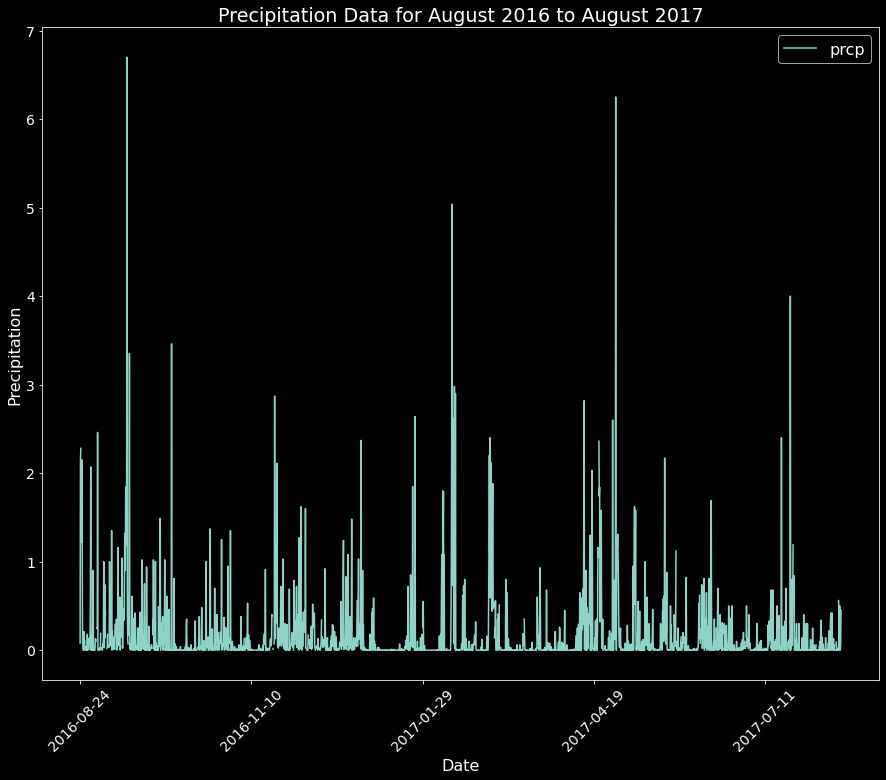

In [20]:
precip_df.plot(
    figsize=(15, 12),
    title='Precipitation Data for August 2016 to August 2017',
    xlabel='Date',
    ylabel='Precipitation',
    fontsize=14,
    rot=45
)

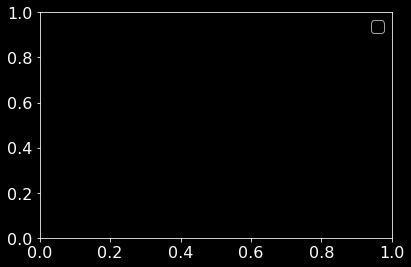

In [21]:
plt.legend(['Precipitation'])
plt.tight_layout()

In [22]:
plt.savefig(r'Resources/precip.png', dpi=300)

<Figure size 432x288 with 0 Axes>

Use Pandas to calculate the summary statistics for the precipitation data

In [23]:
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Exploratory Station Analysis<br>
Design a query to calculate the total number stations in the dataset

In [24]:
Stations = session.query(Station)
num_stations = Stations.count()

In [25]:
print(
    f'There are {num_stations} stations in this data.'
)

There are 9 stations in this data.


Design a query to find the most active stations<br>
(i.e. what stations have the most rows?)<br>
List the stations and the counts in descending order.

In [26]:
active_stations = session.query(
    Measurement.station, func.count(Measurement.station)
).group_by(
    Measurement.station
).order_by(
    func.count(Measurement.station).desc()
).all()

In [27]:
for station, count in active_stations:
    print(f'Station {station} has {count} measurements.')

Station USC00519281 has 2772 measurements.
Station USC00519397 has 2724 measurements.
Station USC00513117 has 2709 measurements.
Station USC00519523 has 2669 measurements.
Station USC00516128 has 2612 measurements.
Station USC00514830 has 2202 measurements.
Station USC00511918 has 1979 measurements.
Station USC00517948 has 1372 measurements.
Station USC00518838 has 511 measurements.


Using the most active station id from the previous query,<br>
calculate the lowest, highest, and average temperature.

In [28]:
station = active_stations[0][0]

In [29]:
temps = session.query(
    Measurement.station, Measurement.date, Measurement.tobs
).filter(
    Measurement.station == station
).filter(
    Measurement.date > year_ago
).order_by(
    Measurement.date
).all()

In [30]:
temp_df = pd.DataFrame(
    temps,
    columns=['station', 'date', 'tobs']
)

In [31]:
low, high, mean = temp_df['tobs'].min(), temp_df['tobs'].max(), temp_df['tobs'].mean()

In [32]:
print(
    f'Low: {low}\n'
    f'High: {high}\n'
    f'Mean: {mean}'
)

Low: 59.0
High: 83.0
Mean: 73.0968660968661


Using the most active station id<br>
Query the last 12 months of temperature observation data for this station<br>
and plot the results as a histogram

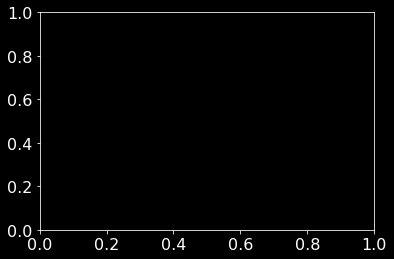

In [33]:
fig, ax = plt.subplots()

<AxesSubplot:title={'center':'Observed Temperatures for August 2016 to August 2017'}, ylabel='Frequency'>

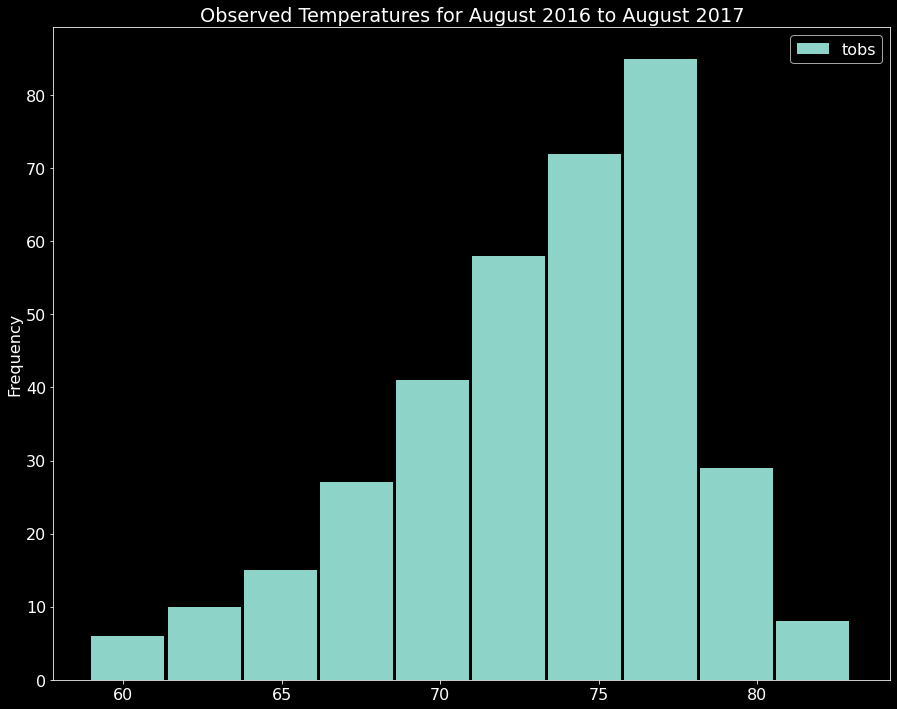

In [34]:
temp_df.plot(
    kind='hist',
    figsize=(15, 12),
    title='Observed Temperatures for August 2016 to August 2017',
    fontsize=16,
    width=2.3
)

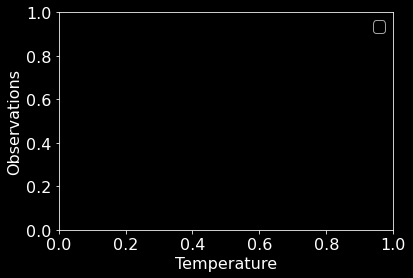

In [35]:
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.legend(['Observed Temps'])

In [36]:
plt.tight_layout()
plt.savefig(r'Resources/temp_dist.png', dpi=300)

<Figure size 432x288 with 0 Axes>

Close Session

In [37]:
session.close()